### TEAM JS2 

# EDSA - Climate Change Belief Analysis 2021


## Overview 12

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

# 1: Importing libraries

In [2]:
import pandas as pd
import numpy as np
import nltk
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.utils import resample

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.metrics import f1_score
from sklearn import metrics

## The data

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018!

In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes: 2, 1, 0, -1

Class Description:

2 News: the tweet links to factual news about climate change

1 Pro: the tweet supports the belief of man-made climate change

0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

-1 Anti: the tweet does not believe in man-made climate change Variable definitions

Columns:

sentiment: Sentiment of tweet

message: Tweet body

tweetid: Twitter unique id

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test_with_no_labels.csv")

In [4]:
train

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732


In [5]:
test

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928
...,...,...
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714
10542,2016: the year climate change came home: Durin...,875167
10543,RT @loop_vanuatu: Pacific countries positive a...,78329
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455


### Let's see if there is a imbalance in the data:

In [6]:
train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

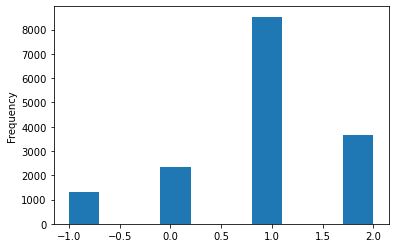

In [7]:
# View class distribution to confirm balance/imbalance
train['sentiment'].plot(kind='hist')
plt.show()

C:\Users\Wilbul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

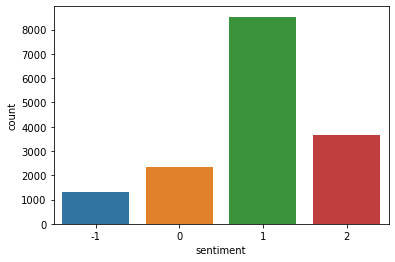

In [8]:
sns.countplot(train['sentiment'])

# 2: Balancing the data

In [9]:
news = train[train['sentiment'] == 2]
pro = train[train['sentiment'] == 1]
neutral = train[train['sentiment'] == 0]
anti = train[train['sentiment'] == -1]

In [10]:
news_upsampled = resample(news, replace=True, n_samples=len(pro), random_state=27)
neutral_upsampled = resample(neutral, replace=True, n_samples=len(pro), random_state=27)
anti_upsampled = resample(anti, replace=True, n_samples=len(pro), random_state=27)

## Combine majority and new upsampled minority

In [11]:
df_upsampled = pd.concat([pro, news_upsampled, neutral_upsampled, anti_upsampled])

In [12]:
df_upsampled.sentiment.value_counts()

-1    8530
 2    8530
 1    8530
 0    8530
Name: sentiment, dtype: int64

In [13]:
df_upsampled.shape

(34120, 3)

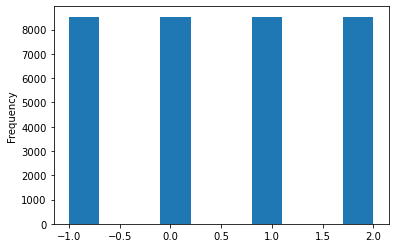

In [14]:
# View class distribution to confirm balance/imbalance
df_upsampled['sentiment'].plot(kind='hist')
plt.show()

C:\Users\Wilbul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

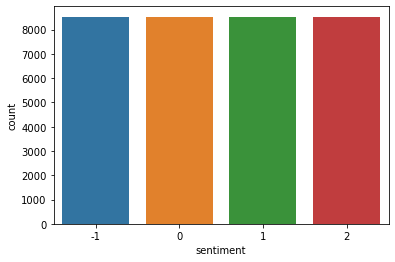

In [15]:
sns.countplot(df_upsampled['sentiment'])

In [16]:
df_upsampled

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
...,...,...,...
5422,-1,RT @worldnetdaily: Sorry global warming liars....,857394
11148,-1,RT @charlesadler: #Trudeau gov now admitting l...,509562
11428,-1,That would be a natural storm and of course po...,158073
1341,-1,RT @TheFoundingSon: NOAA scientists manipulate...,905959


# 3: Get Data ready for train test split

## Splitting out the X variable from the target

In [17]:
y = df_upsampled['sentiment']
X = df_upsampled['message']

## Turning text into something your model can read

In [18]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words="english", max_df=0.75)
X_vectorized = vectorizer.fit_transform(X)

# 4: Train and test models

## Splitting the training data into a training and validation set

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.1, shuffle=True, stratify=y, random_state=11)

## Training the model and evaluating using the validation set

In [20]:
# Linear SVC
lsvc = LinearSVC()
# Fit model to training data
lsvc.fit(X_train, y_train)
# Use trained model to run prediction on validation data
y_pred_lsvc = lsvc.predict(X_test)

## Checking the performance of our model on the validation set

In [21]:
print("Model: Linear SVC Metrics")
print(metrics.classification_report(y_test, y_pred_lsvc ))

Model: Linear SVC Metrics
              precision    recall  f1-score   support

          -1       0.99      1.00      0.99       853
           0       0.97      0.98      0.98       853
           1       0.95      0.92      0.94       853
           2       0.96      0.96      0.96       853

    accuracy                           0.97      3412
   macro avg       0.97      0.97      0.97      3412
weighted avg       0.97      0.97      0.97      3412



# 5: Model Evaluation

# 6: Use best model on our test/real word data

## Getting our test set ready

In [22]:
test_X = test['message']
test_vect = vectorizer.transform(test_X)

## Making predictions on the test set and adding a sentiment column to our original test df

In [23]:
y_pred = lsvc.predict(test_vect)

In [24]:
test['sentiment'] = y_pred

In [25]:
test.head()

,message,tweetid,sentiment
0,Europe will now be looking to China to make su...,169760,1
1,Combine this with the polling of staffers re c...,35326,1
2,"The scary, unimpeachable evidence that climate...",224985,1
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,1
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,1


## Creating an output csv for submission

In [26]:
test[['tweetid','sentiment']].to_csv('LinearSVCsubmission2.csv', index=False)